In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import minimize
# Step 2: Enable interactive mode for Jupyter Notebook
%matplotlib inline
np.set_printoptions(formatter={'float_kind': lambda x: f"{x:0.6f}"})

In [25]:
df = pd.read_excel('data8.xlsx')

In [26]:
df

,x1,x2,x3,x4,x5,x6,x7,x8,y,Notes
0,0.056447,0.065956,0.022929,0.038786,0.403935,0.801055,0.488307,0.893085,9.598482,NaN
1,0.192640,0.630677,0.416796,0.490529,0.796086,0.654567,0.276241,0.295518,9.344274,NaN
2,0.481245,0.102461,0.219486,0.677322,0.247509,0.244341,0.163825,0.715962,9.183005,NaN
3,0.145120,0.119328,0.420888,0.387609,0.155423,0.875172,0.510560,0.728611,9.141639,NaN
4,0.044329,0.013581,0.258198,0.577644,0.051280,0.158563,0.591030,0.077953,9.013075,NaN
5,0.143550,0.937415,0.232325,0.009043,0.414579,0.409325,0.553779,0.205841,8.976554,NaN
6,0.028947,0.028279,0.481372,0.613175,0.672660,0.022113,0.601483,0.524885,8.830745,NaN
7,0.338954,0.566932,0.376751,0.098916,0.659452,0.245548,0.762483,0.732153,8.817558,NaN
8,0.359909,0.249076,0.495997,0.709215,0.114987,0.289207,0.557295,0.593882,8.606117,NaN
9,0.778818,0.003419,0.337983,0.519528,0.820907,0.537247,0.551347,0.660032,8.541748,NaN


In [27]:
df = df.drop(columns=['Notes'])
df=df.dropna()

In [28]:
df

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,0.056447,0.065956,0.022929,0.038786,0.403935,0.801055,0.488307,0.893085,9.598482
1,0.192640,0.630677,0.416796,0.490529,0.796086,0.654567,0.276241,0.295518,9.344274
2,0.481245,0.102461,0.219486,0.677322,0.247509,0.244341,0.163825,0.715962,9.183005
3,0.145120,0.119328,0.420888,0.387609,0.155423,0.875172,0.510560,0.728611,9.141639
4,0.044329,0.013581,0.258198,0.577644,0.051280,0.158563,0.591030,0.077953,9.013075
5,0.143550,0.937415,0.232325,0.009043,0.414579,0.409325,0.553779,0.205841,8.976554
6,0.028947,0.028279,0.481372,0.613175,0.672660,0.022113,0.601483,0.524885,8.830745
7,0.338954,0.566932,0.376751,0.098916,0.659452,0.245548,0.762483,0.732153,8.817558
8,0.359909,0.249076,0.495997,0.709215,0.114987,0.289207,0.557295,0.593882,8.606117
9,0.778818,0.003419,0.337983,0.519528,0.820907,0.537247,0.551347,0.660032,8.541748


In [29]:
# two highest points in top_2_indices will have color in red
top_2_indices = df['y'].nlargest(2).index
top_qntl_index = df['y'].nlargest(int(df.shape[0]/4.0)).index
colors = np.full(df.shape[0], 'b', dtype=object)  # Default color is blue
colors[top_qntl_index] = 'y'
colors[top_2_indices] = 'r'  # Color top points red

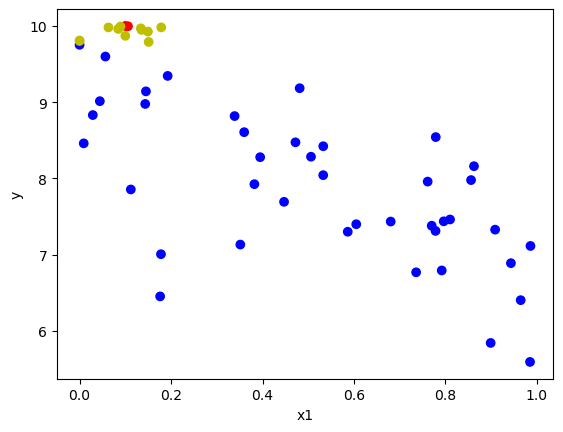

In [30]:
plt.scatter(df['x1'],df['y'], c = colors)
# Highlight the two highest y values
plt.ylabel('y')
plt.xlabel('x1')
plt.show()

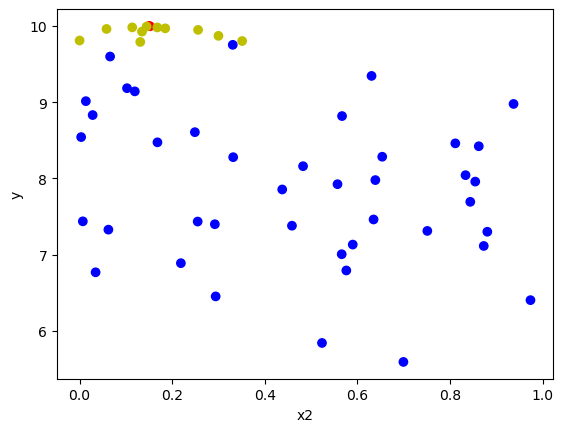

In [31]:
plt.scatter(df['x2'],df['y'], c = colors)
# Highlight the two highest y values
plt.ylabel('y')
plt.xlabel('x2')
plt.show()

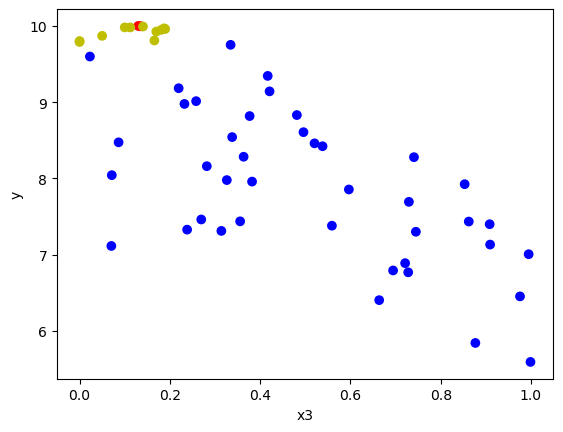

In [32]:
plt.scatter(df['x3'],df['y'], c = colors)
# Highlight the two highest y values
plt.ylabel('y')
plt.xlabel('x3')
plt.show()

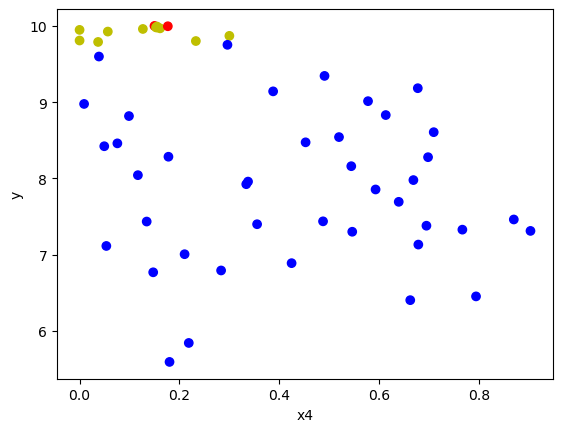

In [33]:
plt.scatter(df['x4'],df['y'], c = colors)
# Highlight the two highest y values
plt.ylabel('y')
plt.xlabel('x4')
plt.show()

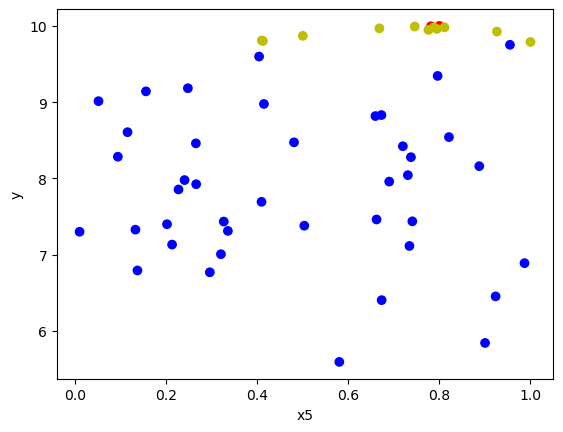

In [34]:
plt.scatter(df['x5'],df['y'], c = colors)
# Highlight the two highest y values
plt.ylabel('y')
plt.xlabel('x5')
plt.show()

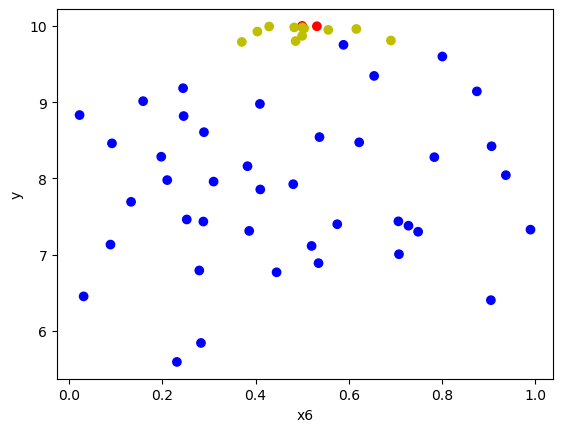

In [35]:
plt.scatter(df['x6'],df['y'], c = colors)
# Highlight the two highest y values
plt.ylabel('y')
plt.xlabel('x6')
plt.show()

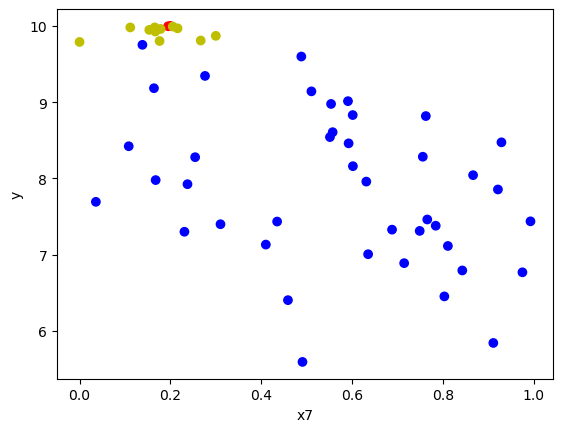

In [36]:
plt.scatter(df['x7'],df['y'], c = colors)
# Highlight the two highest y values
plt.ylabel('y')
plt.xlabel('x7')
plt.show()

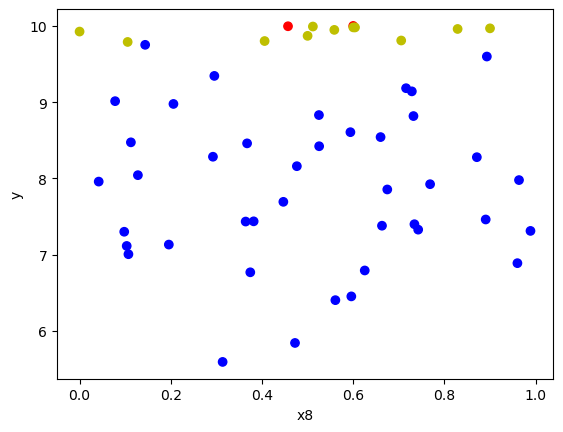

In [37]:
plt.scatter(df['x8'],df['y'], c = colors)
# Highlight the two highest y values
plt.ylabel('y')
plt.xlabel('x8')
plt.show()

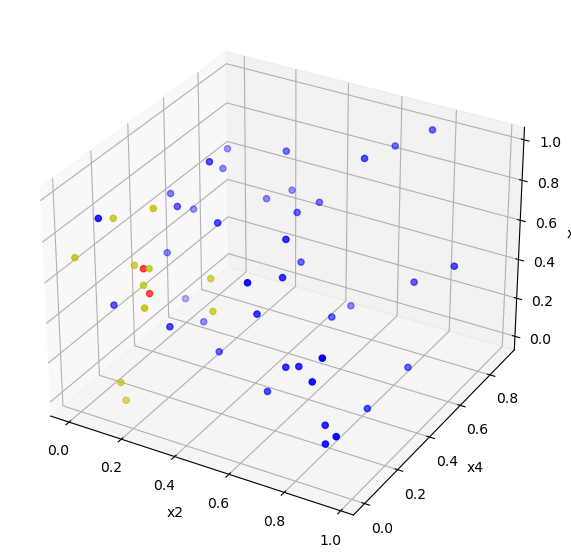

In [38]:
#%matplotlib notebook
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
# Plot the surface
ax.scatter(df['x2'], df['x4'], df['x8'], c = colors)
# Set labels
ax.set_xlabel('x2')
ax.set_ylabel('x4')
ax.set_zlabel('x8')
# Display the plot
plt.show()

In [39]:
%matplotlib inline

In [40]:
x = np.array([0.1, 0.15, 0.2, 0.5, 0.6, 0.75, 0.8]).reshape(-1,1)

In [41]:
x_grid = np.array([[x1, x2, x3, x4, x5, x6, x7, x8] for x1 in x for x2 in x for x3 in x for x4 in x for x5 in x for x6 in x for x7 in x for x8 in x])

In [42]:
x_grid = x_grid.squeeze()

In [43]:
X = df.iloc[:,:-1].to_numpy()

In [44]:
y = df.iloc[:,-1].to_numpy()

# Use Gaussian Process Regressor with Radial Based Function 

In [54]:
kernel = RBF(length_scale = 0.5, length_scale_bounds=(1e-2 , 1e5))
bo_model = GaussianProcessRegressor(kernel = kernel, alpha = 1e-8, n_restarts_optimizer=200)

In [56]:
bo_model.fit(X, y)

GaussianProcessRegressor(alpha=1e-08, kernel=RBF(length_scale=0.5),
                         n_restarts_optimizer=200)

In [57]:
# Check that predicted values are equal originals - this is just a control point
#np.column_stack( (y,bo_model.predict(X)) )

In [58]:
kr = bo_model.kernel_

In [59]:
kr.length_scale

1.6156994557495168

In [60]:
# Predict for the grid
post_mean, post_std = bo_model.predict(x_grid, return_std=True)

In [61]:
# Define aquiring function
a_fun = post_mean + 2 * post_std

In [62]:
# Find the index and maximum value of aquiring function
i = np.argmax(a_fun)
print('The maximum of aquering function is', a_fun[i],'the max index is',i)
print('the next point for Bayesian Optimization is',x_grid[i])

The maximum of aquering function is 10.011305698882959 the max index is 1082673
the next point for Bayesian Optimization is [0.150000 0.200000 0.150000 0.200000 0.800000 0.500000 0.200000 0.600000]


In [63]:
bo_model.predict([x_grid[i]])

array([9.999678])

In [64]:
from scipy.optimize import minimize
def aquisition_fun(x):
    x = np.atleast_2d(x)
    post_mean, post_std = bo_model.predict(x, return_std=True)
    return -(post_mean + 2 * post_std)
result = minimize(aquisition_fun, x_grid[i], bounds=[(0, 0.999999)]*8, tol=1e-8)
optimal_point = result.x
optimal_value = -result.fun

In [65]:
print("Optimized value", optimal_value)
print("at point", optimal_point)

Optimized value 10.01374669179367
at point [0.137225 0.208964 0.164499 0.189525 0.802430 0.497933 0.173136 0.558089]


# Find the next point based on gradient in max point

In [66]:
# Find the maximum value in y and its index
max_index = top_2_indices[0]
max_value = y[max_index]
print('max value =', max_value)
# Calculate distances from the point with maximum y to all other points
distances = np.linalg.norm(X - X[max_index], axis=1)
print('Distances', distances)
# Sort the distances and get the indices of the closest neighbors (excluding itself)
# THE NUMBER OF POINTS IS EQUIAL TO THE TOTAL DIMENTIONALITY!!!
closest_indices = np.argsort(distances)[1:9]
# Indices of the three points (max point + two closest neighbors)
indices_to_use = np.concatenate(([max_index], closest_indices))
print('indices to use', indices_to_use)
# Show overage distance of closest points. Step should not be far away
print("Average distance",distances[indices_to_use].mean())
# Extract the points and their corresponding y values
X_selected = X[indices_to_use]
y_selected = y[indices_to_use]
print(X_selected)
# Fit a linear hyperplane using the selected points
l2_model = LinearRegression()
l2_model.fit(X_selected, y_selected)
# Coefficients of the linear hyperplane
coefficients = l2_model.coef_
intercept = l2_model.intercept_
# Define the maximum point
max_point = X[max_index]
# Calculate the gradient of the hyperplane
gradient = coefficients
# Define the distance to move along the gradient direction
distance = 0.1
# Normalize the gradient to unit length
gradient_unit = gradient / np.linalg.norm(gradient)
# Move from the maximum point in the direction of the gradient by the specified distance
highest_point_on_hyperplane = np.clip(max_point + distance * gradient_unit, 0, 0.999999)
# Calculate the y value at this highest point
highest_y_value_on_hyperplane = l2_model.predict([highest_point_on_hyperplane])[0]
print("Highest point on hyperplane within",distance,"distance:\n", highest_point_on_hyperplane)
print("Highest y value on hyperplane within",distance,"distance:", highest_y_value_on_hyperplane)
print("Gradient_unit\n",gradient_unit)
point1 = highest_point_on_hyperplane

max value = 10.0
Distances [0.670309 0.748514 0.905013 0.901816 1.150488 1.043815 0.877086 0.844262
 1.079545 0.889360 1.057491 1.124735 1.028281 1.211509 0.976784 1.033738
 1.233868 1.283878 1.256246 1.057233 1.165721 1.240468 1.327239 1.180124
 1.124415 1.147755 1.228953 1.413564 1.450420 1.498440 1.365794 1.394748
 1.279418 1.253556 1.378149 1.297863 1.324999 1.490821 1.385420 1.458816
 0.401746 0.631878 0.510257 0.591351 0.336783 0.611541 0.512724 0.150321
 0.000000 0.126734 0.100000 0.212548 0.100000 0.281486]
indices to use [48 50 52 49 47 51 53 44 40]
Average distance 0.18995767161965427
[[0.100000 0.150000 0.130000 0.150000 0.800000 0.500000 0.200000 0.600000]
 [0.178578 0.113745 0.100020 0.153113 0.811081 0.483118 0.165435 0.600251]
 [0.063136 0.167886 0.112207 0.155143 0.787524 0.500632 0.111646 0.603962]
 [0.089378 0.144895 0.140482 0.154993 0.745826 0.429206 0.205178 0.511601]
 [0.105873 0.151817 0.135872 0.176745 0.781381 0.531677 0.194958 0.457055]
 [0.135406 0.256005 0.1

# Aproximate the function with quadratic polinome and find max

In [67]:
# The number of points for n dimentional space
def num_of_nonl_param(n):
    # function returns the number of minimum points for quadratic polynomal
    n = np.array(n)
    return int(1 + 2 * n + n * (n-1) / 2)

In [68]:
# Prepare data
poly = PolynomialFeatures(2, include_bias = False)
XN = poly.fit_transform(X)

In [69]:
max_index=np.argmax(y) 
max_value = y[max_index]
#print('max value =', max_value)
# Calculate distances from the point with maximum y to all other points
distances = np.linalg.norm(X - X[max_index], axis=1)

In [70]:
def apprF(n):
    # Sort the distances and get the indices of the two closest neighbors (excluding itself)
    # THE NUMBER OF POINTS IS EQUIAL TO THE TOTAL DIMENTIONALITY!!!
    closest_indices = np.argsort(distances)[1:n]
    # Indices of the three points (max point + two closest neighbors)
    indices_to_use = np.concatenate(([max_index], closest_indices))
    #print('indices to use', indices_to_use)
    # Show overage distance of closest points. Step should not be far away
    print("Average distance",distances[indices_to_use].mean())
    # Extract the points and their corresponding y values
    XN_selected = XN[indices_to_use]
    y_selected = y[indices_to_use]
    # print(X_selected)
    # Fit a linear hyperplane using the selected points
    lreg = LinearRegression()
    lreg.fit(XN_selected, y_selected)
    print(np.column_stack( (y_selected, lreg.predict(XN_selected)) ))
    print(lreg.score(XN_selected,y_selected))
    return lreg

In [71]:
num_of_nonl_param(8)

45

In [72]:
lreg = apprF(57)

Average distance 0.9508893156794058
[[10.000000 10.000000]
 [9.980895 9.980895]
 [9.980293 9.980293]
 [9.992079 9.992079]
 [9.995838 9.995838]
 [9.948074 9.948074]
 [9.960136 9.960136]
 [9.968320 9.968320]
 [9.869800 9.869800]
 [9.808706 9.808706]
 [9.801782 9.801782]
 [9.752066 9.752066]
 [9.789739 9.789739]
 [9.925950 9.925950]
 [9.598482 9.598482]
 [9.344274 9.344274]
 [8.817558 8.817558]
 [8.830745 8.830745]
 [8.541748 8.541748]
 [9.141639 9.141639]
 [9.183005 9.183005]
 [8.278062 8.278062]
 [8.421759 8.421759]
 [8.159983 8.159983]
 [8.976554 8.976554]
 [7.923759 7.923759]
 [8.472936 8.472936]
 [8.606117 8.606117]
 [7.433744 7.433744]
 [8.459482 8.459482]
 [7.398721 7.398721]
 [9.013075 9.013075]
 [7.854541 7.854541]
 [7.436594 7.436594]
 [8.284008 8.284008]
 [7.379083 7.379083]
 [8.042213 8.042213]
 [7.692368 7.692368]
 [6.887846 6.887846]
 [7.957875 7.957875]
 [7.005227 7.005227]
 [7.977685 7.977685]
 [6.767963 6.767963]
 [6.451943 6.451943]
 [7.460872 7.460872]
 [7.131624 7.1316

In [73]:
# The squre polynom perfectly fits all data! Let's find max point and formula

In [74]:
X0 = X[max_index,:] 
def opt_fun(x):
    polynom = poly.fit_transform(x.reshape(1, -1))
    return -lreg.predict(polynom)

In [75]:
step = 0.9
bnds = []
for i in range(0,len(X0)): bnds.append( (max(X0[i]-step,0), min(X0[i]+step,0.999999)) )
print('Bonds\n', np.array(bnds))

Bonds
 [[0.000000 0.999999]
 [0.000000 0.999999]
 [0.000000 0.999999]
 [0.000000 0.999999]
 [0.000000 0.999999]
 [0.000000 0.999999]
 [0.000000 0.999999]
 [0.000000 0.999999]]


In [76]:
result = minimize(opt_fun, X0, bounds=bnds, tol=1e-5)

In [77]:
print(result)

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: -10.000000000100048
        x: [ 1.000e-01  1.500e-01  1.300e-01  1.500e-01  8.000e-01
             5.000e-01  2.000e-01  6.000e-01]
      nit: 0
      jac: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
             0.000e+00  0.000e+00  0.000e+00]
     nfev: 9
     njev: 1
 hess_inv: <8x8 LbfgsInvHessProduct with dtype=float64>


In [78]:
print('The point is',result.x)

The point is [0.100000 0.150000 0.130000 0.150000 0.800000 0.500000 0.200000 0.600000]


In [79]:
print(f'Estimated max value {-result.fun:0.3f}')

Estimated max value 10.000


In [80]:
# See coefficients
for x in lreg.coef_:
    print("{:.2f}".format(x))

0.40
0.30
0.78
0.30
0.80
1.00
0.80
0.12
-2.00
-0.00
0.00
-0.00
-0.00
0.00
-0.00
-0.00
-1.00
0.00
0.00
0.00
-0.00
0.00
0.00
-3.00
0.00
0.00
-0.00
-0.00
-0.00
-1.00
-0.00
-0.00
-0.00
0.00
-0.50
-0.00
0.00
0.00
-1.00
-0.00
0.00
-2.00
-0.00
-0.10


In [81]:
lreg.intercept_

9.198299999180184

In [82]:
# Restore the function 8:
def y(x1,x2,x3,x4,x5,x6,x7,x8):
    y = 9.1983 + 0.4*x1 + 0.3*x2 + 0.78*x3 + 0.3*x4 + 0.8*x5 + x6 + 0.8*x7 + 0.12*x8 - 2*x1**2 - x2**2 -3*x3**2 -x4**2 -0.5*x5**2 - x6**2 -2*x7**2 - 0.1*x8**2
    return y 

In [83]:
y(0.1, 0.15, 0.13, 0.15, 0.8, 0.5, 0.2, 0.6)

9.999999999999996

In [51]:
# The end